In [363]:
df = pd.concat([
    pd.read_csv("iedb-class1-condensed.csv", index_col=0),
    pd.read_csv("iedb-nonclassical-condensed.csv", index_col=0),
])

In [364]:
df

,allele,mhc_class,peptide,peptide_length,organism,antigen_name,assay_group,assay_method,assay_name,assay_id,units,meas,is_quantitative,qualitative_meas,reference_authors,reference_journal,reference_title,reference_date
0,HLA-A*02:01,I,KLEDLERDL,9,Hepatitis delta virus TW2667,large delta antigen,qualitative binding,cellular MHC/direct/fluorescence,qualitative binding ::: cellular MHC/direct/fl...,185,NaN,1.0,False,Positive-Low,Yi-Hsiang Huang; Mi-Hua Tao; Cheng-po Hu; Wan-...,J Gen Virol,Identification of novel HLA-A*0201-restricted ...,2004
1,HLA-A2,I,LITGRLQSL,9,SARS coronavirus,Spike glycoprotein precursor,qualitative binding,cellular MHC/direct/fluorescence,qualitative binding ::: cellular MHC/direct/fl...,185,NaN,1.0,False,Positive-High,Yue-Dan Wang; Wan-Yee Fion Sin; Guo-Bing Xu; H...,J Virol,T-cell epitopes in severe acute respiratory sy...,2004
2,H2-Kb,I,TRVAFAGL,8,Salmonella enterica subsp. enterica serovar Ty...,outer membrane porin C precursor - Salmonella ...,qualitative binding,cellular MHC/direct/fluorescence,qualitative binding ::: cellular MHC/direct/fl...,185,NaN,1.0,False,Positive,Alberto Diaz-Qui&ntilde;onez; Natalia Martin-O...,Infect Immun,Two Salmonella OmpC K(b)-restricted epitopes f...,2004
3,H2-Kb,I,RNTDFFGL,8,Salmonella enterica subsp. enterica serovar Ty...,outer membrane porin C precursor - Salmonella ...,qualitative binding,cellular MHC/direct/fluorescence,qualitative binding ::: cellular MHC/direct/fl...,185,NaN,1.0,False,Positive,Alberto Diaz-Qui&ntilde;onez; Natalia Martin-O...,Infect Immun,Two Salmonella OmpC K(b)-restricted epitopes f...,2004
4,HLA-A*03:01,I,EVMPVSMAK,9,SARS coronavirus,Spike glycoprotein precursor,dissociation constant KD (~EC50),purified MHC/direct/fluorescence,dissociation constant KD (~EC50) ::: purified ...,418,nM,473.0,True,Positive-Intermediate,C Sylvester-Hvid; M Nielsen; K Lamberth; G R&o...,Tissue Antigens,"SARS CTL vaccine candidates; HLA supertype-, g...",2004
5,HLA-A*11:01,I,EVMPVSMAK,9,SARS coronavirus,Spike glycoprotein precursor,dissociation constant KD (~EC50),purified MHC/direct/fluorescence,dissociation constant KD (~EC50) ::: purified ...,418,nM,19.0,True,Positive-High,C Sylvester-Hvid; M Nielsen; K Lamberth; G R&o...,Tissue Antigens,"SARS CTL vaccine candidates; HLA supertype-, g...",2004
6,HLA-A*03:01,I,KTFPPTEPK,9,SARS coronavirus,Nucleoprotein,dissociation constant KD (~EC50),purified MHC/direct/fluorescence,dissociation constant KD (~EC50) ::: purified ...,418,nM,186.0,True,Positive-Intermediate,C Sylvester-Hvid; M Nielsen; K Lamberth; G R&o...,Tissue Antigens,"SARS CTL vaccine candidates; HLA supertype-, g...",2004
7,HLA-A*11:01,I,KTFPPTEPK,9,SARS coronavirus,Nucleoprotein,dissociation constant KD (~EC50),purified MHC/direct/fluorescence,dissociation constant KD (~EC50) ::: purified ...,418,nM,70.0,True,Positive-Intermediate,C Sylvester-Hvid; M Nielsen; K Lamberth; G R&o...,Tissue Antigens,"SARS CTL vaccine candidates; HLA supertype-, g...",2004
8,HLA-A*03:01,I,ATFSVPMEK,9,SARS coronavirus,Replicase polyprotein 1ab,dissociation constant KD (~EC50),purified MHC/direct/fluorescence,dissociation constant KD (~EC50) ::: purified ...,418,nM,265.0,True,Positive-Intermediate,C Sylvester-Hvid; M Nielsen; K Lamberth; G R&o...,Tissue Antigens,"SARS CTL vaccine candidates; HLA supertype-, g...",2004
9,HLA-A*11:01,I,ATFSVPMEK,9,SARS coronavirus,Replicase polyprotein 1ab,dissociation constant KD (~EC50),purified MHC/direct/fluorescence,dissociation constant KD (~EC50) ::: purified ...,418,nM,28.0,True,Positive-High,C Sylvester-Hvid; M Nielsen; K Lamberth; G R&o...,Tissue Antigens,"SARS CTL vaccine candidates; HLA supertype-, g...",2004


In [365]:
df.units.value_counts()

nM           148417
min           10190
angstroms       561
&deg;C          288
1/s              42
nM^-1s^-1        26
Name: units, dtype: int64

In [366]:
stability_mask = df.units == "min"

In [367]:
df[stability_mask].assay_method.value_counts()

purified MHC/direct/radioactivity    6632
purified MHC/direct/fluorescence     3261
cellular MHC/direct/fluorescence      272
lysate MHC/direct/radioactivity        13
cellular MHC/direct/radioactivity      12
Name: assay_method, dtype: int64

In [368]:
df[stability_mask].meas.describe()

count    10190.000000
mean       308.646073
std        929.602371
min          0.000000
25%          1.100000
50%         54.000000
75%        300.000000
max      47348.000000
Name: meas, dtype: float64

In [369]:
np.percentile(df[stability_mask].meas, 50)

54.0

In [370]:
%matplotlib inline
x = 1 + np.arange(100)
y = np.percentile(df[stability_mask].meas, x)


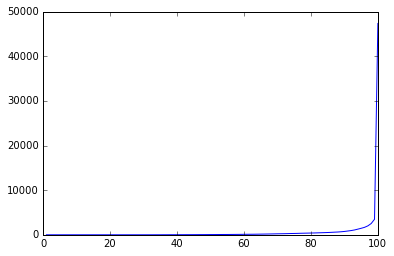

In [371]:
import pylab
pylab.plot(x, y)

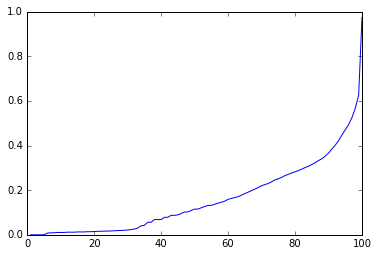

In [372]:
import pylab
pylab.plot(x, 1-np.exp(-np.sqrt(y)/60))

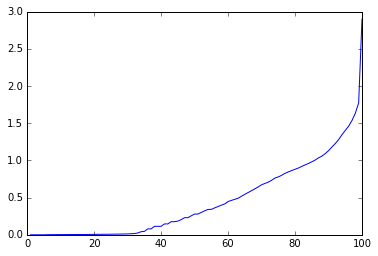

In [373]:
pylab.plot(x, np.log10(1+y/60))

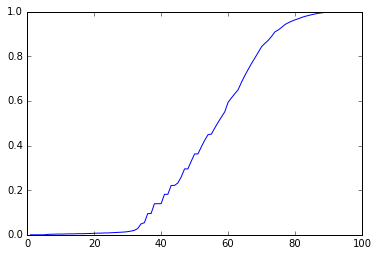

In [374]:
pylab.plot(x, 1-np.exp(-y/120))

In [375]:
np.percentile(df[stability_mask].meas, 60)/60

1.8

In [376]:
df[df.assay_method == "cellular MHC/direct/radioactivity"]["assay_group"].value_counts()

qualitative binding    67
half life              12
Name: assay_group, dtype: int64

In [377]:
df.assay_name.value_counts()

ligand presentation ::: cellular MHC/mass spectrometry                                     132381
dissociation constant KD (~IC50) ::: purified MHC/competitive/radioactivity                 66064
dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence                       38715
ligand presentation ::: secreted MHC/mass spectrometry                                      20977
qualitative binding ::: purified MHC/direct/fluorescence                                    20185
dissociation constant KD ::: purified MHC/competitive/fluorescence                          19420
half maximal inhibitory concentration (IC50) ::: cellular MHC/competitive/fluorescence      16071
qualitative binding ::: cellular MHC/direct/fluorescence                                     7629
half life ::: purified MHC/direct/radioactivity                                              6632
half maximal inhibitory concentration (IC50) ::: purified MHC/competitive/fluorescence       4390
ligand presentation 

In [378]:
modified_peptides_mask =  df.peptide.str.contains("\+") | df.peptide.str.contains(" ")

In [379]:
normal_peptide_sequences_mask = ~modified_peptides_mask

In [380]:
stability_mask = df.units == "min"

In [381]:
affinity_mask = df.units == "nM"

In [382]:
length_mask = (df.peptide_length >= 7) & (df.peptide_length <= 16)
print("Length filter excludes %d/%d peptides" % (len(df) - length_mask.sum(), len(df)))

Length filter excludes 4295/349354 peptides


In [383]:
mask = (stability_mask | affinity_mask) & normal_peptide_sequences_mask

In [384]:
mask.sum()

158535

In [385]:
df_subset = df[mask]

In [386]:
assay_counts = df_subset.assay_name.value_counts()
assay_counts

dissociation constant KD (~IC50) ::: purified MHC/competitive/radioactivity                66049
dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence                      38715
dissociation constant KD ::: purified MHC/competitive/fluorescence                         19418
half maximal inhibitory concentration (IC50) ::: cellular MHC/competitive/fluorescence     16069
half life ::: purified MHC/direct/radioactivity                                             6632
half maximal inhibitory concentration (IC50) ::: purified MHC/competitive/fluorescence      4367
half life ::: purified MHC/direct/fluorescence                                              3257
half maximal inhibitory concentration (IC50) ::: purified MHC/competitive/radioactivity     2367
half maximal effective concentration (EC50) ::: cellular MHC/direct/fluorescence             700
half maximal inhibitory concentration (IC50) ::: cellular MHC/competitive/radioactivity      283
half life ::: cellular MHC/dir

In [387]:
df_subset[df_subset.assay_name == "dissociation constant KD ::: cellular MHC/competitive/radioactivity"]

,allele,mhc_class,peptide,peptide_length,organism,antigen_name,assay_group,assay_method,assay_name,assay_id,units,meas,is_quantitative,qualitative_meas,reference_authors,reference_journal,reference_title,reference_date
11819,H2-Db,I,YIASNENMETMESSTLE,17,NaN,NaN,dissociation constant KD,cellular MHC/competitive/radioactivity,dissociation constant KD ::: cellular MHC/comp...,288,nM,850.0,True,Positive,E R Christinck; M A Luscher; B H Barber; D B W...,Nature,Peptide binding to class I MHC on living cells...,1991


In [388]:
df_subset_gt100 = pd.concat([group for (_, group) in df_subset.groupby("assay_name") if len(group) >= 100])

In [389]:
print(len(df), len(df_subset), len(df_subset_gt100))

349354 158535 158394


In [390]:
subsets = {}
assay_to_units = {}

for key, group in df_subset_gt100.groupby([ "allele", "peptide_length", "assay_name",]):
    (allele, length, assay) = key
    subsets[key] = group
    if assay not in assay_to_units:
        assay_to_units[assay] = group["units"].iloc[0]
        
    
dataframes_by_assay = {}
for assay, group in df_subset_gt100.groupby(["assay_name"]):
    dataframes_by_assay[assay] = group


In [391]:
unique_alleles = {allele for (allele, _, _) in subsets.keys()}

for allele in sorted(unique_alleles):
    count = sum(len(group) for (a, _, _), group in subsets.items() if a == allele)
    print(allele, count)
print("-- total alleles", len(unique_alleles))

BoLA-1*02101 2
BoLA-2*00801 14
BoLA-2*01201 10
BoLA-4*02401 4
BoLA-6*01301 58
BoLA-6*01302 1
ELA-A1 17
Eqca-1*00101 678
Gogo-B*0101 16
H2-Db 3019
H2-Dd 223
H2-Kb 3195
H2-Kb E152A, R155Y, L156Y mutant 3
H2-Kb Y22F, M23I, E24S, D30N mutant 7
H2-Kd 400
H2-Kk 425
H2-Ld 175
H2-d class I 2
H2Lq 3
HLA-A*01:01 4008
HLA-A*02:01 17926
HLA-A*02:01 K66A mutant 1
HLA-A*02:01 K66A, E63Q mutant 1
HLA-A*02:02 5312
HLA-A*02:03 6500
HLA-A*02:04 5
HLA-A*02:05 113
HLA-A*02:06 5934
HLA-A*02:07 88
HLA-A*02:10 18
HLA-A*02:11 723
HLA-A*02:12 898
HLA-A*02:16 611
HLA-A*02:17 332
HLA-A*02:19 844
HLA-A*02:50 127
HLA-A*03:01 7371
HLA-A*03:19 29
HLA-A*11:01 6660
HLA-A*11:02 14
HLA-A*23:01 1776
HLA-A*24:02 3769
HLA-A*24:03 1311
HLA-A*25:01 930
HLA-A*26:01 3649
HLA-A*26:02 410
HLA-A*26:03 283
HLA-A*29:02 1941
HLA-A*30:01 1358
HLA-A*30:02 1472
HLA-A*31:01 4872
HLA-A*32:01 836
HLA-A*32:07 87
HLA-A*32:15 74
HLA-A*33:01 2925
HLA-A*66:01 52
HLA-A*68:01 3081
HLA-A*68:02 6644
HLA-A*68:23 80
HLA-A*69:01 2408
HLA-A*80:01 1142

In [392]:

unique_lengths = {length for (_, length, _) in subsets.keys()}

for length in unique_lengths:
    count = sum(len(group) for (_, l, _), group in subsets.items() if l == length)
    print(length, count)
print("-- total lengths", len(unique_lengths))


5 2
6 2
7 19
8 3960
9 117687
10 34001
11 2477
12 88
13 30
14 25
15 42
16 14
18 8
20 29
21 7
23 1
24 1
30 1
-- total lengths 18


In [393]:

unique_amino_acids = {aa for p in df_subset_gt100.peptide for aa in p }
sorted_amino_acids = list(sorted(unique_amino_acids))
amino_acid_indices = {aa: i for (i, aa) in enumerate(sorted_amino_acids)}
n_amino_acids = len(amino_acid_indices)
print(n_amino_acids)
print(amino_acid_indices)



20
{'Q': 13, 'T': 16, 'R': 14, 'S': 15, 'H': 6, 'D': 2, 'E': 3, 'L': 9, 'A': 0, 'K': 8, 'N': 11, 'W': 18, 'C': 1, 'V': 17, 'F': 4, 'G': 5, 'I': 7, 'M': 10, 'P': 12, 'Y': 19}


In [394]:
sorted_alleles = list(sorted(unique_alleles))
allele_indices = {allele: i for (i, allele) in enumerate(sorted_alleles)}
print(len(allele_indices))
print(allele_indices)

166
{'Patr-B*01:01': 159, 'HLA-A*31:01': 50, 'HLA-B*08:01': 68, 'RT1-Bl': 164, 'HLA-C*07:01': 133, 'HLA-A*24:02': 41, 'Mamu-B*04': 151, 'HLA-B*14:02': 72, 'HLA-B*45:01': 105, 'HLA-B*42:01': 101, 'HLA-B8': 127, 'H2-Kb': 11, 'HLA-A*32:01': 51, 'H2-Kb E152A, R155Y, L156Y mutant': 12, 'HLA-A*02:01 K66A, E63Q mutant': 22, 'HLA-C*08:02': 135, 'HLA-B*27:01': 81, 'BoLA-2*01201': 2, 'HLA-B39': 119, 'HLA-A*30:01': 48, 'HLA-B*55:01': 112, 'HLA-B*27:05': 85, 'HLA-B*37:01': 93, 'HLA-E': 141, 'HLA-Cw1': 139, 'HLA-A*66:01': 55, 'HLA-B*15:17': 78, 'HLA-E*01:01': 142, 'HLA-A*69:01': 59, 'HLA-A*23:01': 40, 'SLA-1*0401': 165, 'HLA-C*03:04': 129, 'BoLA-6*01302': 5, 'Mamu-A1*001:01': 145, 'HLA-B*08:03': 70, 'HLA-B*44:03': 104, 'HLA-A24': 64, 'H2-Kb Y22F, M23I, E24S, D30N mutant': 13, 'BoLA-4*02401': 3, 'Eqca-1*00101': 7, 'HLA-Cw4': 140, 'HLA-A3': 66, 'HLA-B*54:01': 111, 'HLA-B*27:20': 89, 'HLA-A*68:23': 58, 'Patr-A*03:01': 154, 'HLA-A*02:12': 31, 'HLA-C*07:02': 134, 'HLA-A*03:01': 36, 'HLA-B*45:06': 106, '

In [395]:
unique_assays = set(df_subset_gt100.assay_name)
sorted_assays = list(sorted(unique_assays))
assay_indices = {assay: i for (i, assay) in enumerate(sorted_assays)}
n_assays = len(assay_indices)
print(n_assays)
for assay, i in sorted(assay_indices.items()):
    print("%d) %s (n=%d)" % (i, assay, (df_subset_gt100.assay_name == assay).sum()))
    

12
0) dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (n=38715)
1) dissociation constant KD (~IC50) ::: purified MHC/competitive/radioactivity (n=66049)
2) dissociation constant KD ::: purified MHC/competitive/fluorescence (n=19418)
3) half life ::: cellular MHC/direct/fluorescence (n=270)
4) half life ::: purified MHC/direct/fluorescence (n=3257)
5) half life ::: purified MHC/direct/radioactivity (n=6632)
6) half maximal effective concentration (EC50) ::: cellular MHC/direct/fluorescence (n=700)
7) half maximal effective concentration (EC50) ::: purified MHC/direct/fluorescence (n=267)
8) half maximal inhibitory concentration (IC50) ::: cellular MHC/competitive/fluorescence (n=16069)
9) half maximal inhibitory concentration (IC50) ::: cellular MHC/competitive/radioactivity (n=283)
10) half maximal inhibitory concentration (IC50) ::: purified MHC/competitive/fluorescence (n=4367)
11) half maximal inhibitory concentration (IC50) ::: purified MHC/competitive/radioac

In [396]:

from keras.layers import Input, Embedding, LSTM, Dense, merge, Flatten
from keras.models import Model

AMINO_ACID_EMBEDDING_SIZE = 32
ALLELE_EMBEDDING_SIZE = 64
PEPTIDE_HIDDEN_LAYER_SIZE = 64


# create an Input for every distinct combination of peptide length and allele
hidden_node_by_length = {}

n_alleles = len(unique_alleles)

amino_acid_embedding_node = Embedding(20, AMINO_ACID_EMBEDDING_SIZE, name="amino_acid_embedding")
allele_embedding_node = Embedding(n_alleles, ALLELE_EMBEDDING_SIZE, name="allele_embedding")

print("=== Building length-specific peptide dense layers")
MIN_PEPTIDE_LENGTH = 8
MAX_PEPTIDE_LENGTH = 15
peptide_lengths = list(range(MIN_PEPTIDE_LENGTH, MAX_PEPTIDE_LENGTH + 1))
for length in peptide_lengths:
    print("  ", length)
    peptide_dense_node = Dense(
        input_dim=length * AMINO_ACID_EMBEDDING_SIZE,
        output_dim=PEPTIDE_HIDDEN_LAYER_SIZE, 
        activation="tanh",
        name="peptide_%dmer_hidden" % length)
    hidden_node_by_length[length] = peptide_dense_node
    
combined_hidden_by_allele_and_length = {}
outputs_by_assay = {}
models_by_assay_and_length = {}


print("=== Building models")
for assay, subset_df in sorted(dataframes_by_assay.items(), key=lambda x: x[0]):
    sanitized_assay_name = assay.replace(":", "").replace("/", "_").replace("  ", " ").replace(" ", "_")
    output_node = Dense(1, activation="sigmoid", name="output_%s" % sanitized_assay_name)
    
    ###
    # Can't share Input nodes between models so building a separate one for each 
    # allele/assay/length combo but still sharing the parametric layers
    ###
    for length in peptide_lengths:
        n_samples = (dataframes_by_assay[assay].peptide.str.len() == length).sum()
        print("--- #%d: %dmer %s (%d samples)" % (
                len(models_by_assay_and_length) + 1,
                length,
                assay,
                n_samples))
        peptide_input_node = Input(
            shape=(length,),
            dtype='int32',
            name='peptide_%dmer_input' % length)
        peptide_embedded = amino_acid_embedding_node(peptide_input_node)
        flat_peptide_embedded = Flatten(name="flatten_embedding_%dmer" % length)(peptide_embedded)
        peptide_hidden_node = hidden_node_by_length[length]
        peptide_hidden = peptide_hidden_node(flat_peptide_embedded)

        sanitized_allele = allele.replace("*", "").replace(" ", "_").replace("-", "")
        allele_input_node = Input(shape=(1,), dtype='int32', name="allele_%s" % sanitized_allele)
        allele_embedded = allele_embedding_node(allele_input_node)
        flat_allele_embedded = Flatten(name="flat_allele_embedded_%s" % sanitized_allele)(allele_embedded)
        
        combined = merge([peptide_hidden, flat_allele_embedded], concat_axis=-1, mode="concat")
        
        output = output_node(combined)
        model = Model(input=[peptide_input_node, allele_input_node], output=output)
        model.compile(optimizer='rmsprop', loss='mse')
        models_by_assay_and_length[(assay, length)] = model


=== Building length-specific peptide dense layers
   8
   9
   10
   11
   12
   13
   14
   15
=== Building models
--- #1: 8mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (5 samples)
--- #2: 9mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (38689 samples)
--- #3: 10mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (11 samples)
--- #4: 11mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (10 samples)
--- #5: 12mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (0 samples)
--- #6: 13mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (0 samples)
--- #7: 14mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (0 samples)
--- #8: 15mer dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (0 samples)
--- #9: 8mer dissociation constant KD (~IC50) ::: purified MHC/competitive/radioactivity (2702 samples)
--- #10:

In [657]:
# try making just models for the distinct lengths with outputs for each assay

from keras.layers import Dropout, BatchNormalization

def make_models(
        n_assays=len(unique_assays), 
        n_alleles=len(unique_alleles), 
        amino_acid_embedding_size=32, 
        allele_embedding_size=64, 
        combined_hidden_layer_size=8,
        min_peptide_length=8,
        max_peptide_length=11,
        n_amino_acids=20,
        dropout_probability_after_combine=0.5,
        dropout_probability_after_hidden=0.5,
        merge_mode="mul",
        optimizer="adam"):
 
    peptide_lengths = list(range(min_peptide_length, max_peptide_length + 1))
    
    amino_acid_embedding_node = Embedding(n_amino_acids, amino_acid_embedding_size, name="amino_acid_embedding")
    allele_embedding_node = Embedding(n_alleles, allele_embedding_size, name="allele_embedding")

    combined_hidden_node = Dense(combined_hidden_layer_size, name="hidden_after_combine", activation="tanh")
    output_node = Dense(n_assays, activation="sigmoid", name="multi_assay_output")

    models_by_length = {}

    for length in peptide_lengths:
        print("Making model for peptide length %dmer" % length)
        peptide_input_node = Input(
            shape=(length,),
            dtype='int32',
            name='peptide')

        peptide_embedded = amino_acid_embedding_node(peptide_input_node)
        flat_peptide_embedded = Flatten(name="flatten_embedding_%dmer" % length)(peptide_embedded)
        peptide_dense_node = Dense(
            input_dim=length * amino_acid_embedding_size,
            output_dim=allele_embedding_size, 
            activation="tanh",
            name="peptide_%dmer_hidden" % length)
        peptide_hidden_activation = peptide_dense_node(flat_peptide_embedded)
        
        allele_input_node = Input(shape=(1,), dtype='int32', name="allele")
        allele_embedded = allele_embedding_node(allele_input_node)
        flat_allele_embedded = Flatten(name="flat_allele_embedded_for_%dmer_peptides" % length)(allele_embedded)

        x = merge([peptide_hidden_activation, flat_allele_embedded], concat_axis=-1, mode=merge_mode, name="combined")
        x = Dropout(dropout_probability_after_combine)(x)
        
        x = combined_hidden_node(x)
        x = Dropout(dropout_probability_after_hidden)(x)
        
        output = output_node(x)

        model = Model(input=[peptide_input_node, allele_input_node], output=output)
        model.compile(optimizer=optimizer, loss=masked_mean_squared_error)
        models_by_length[length] = model
    return models_by_length
    
models_by_length = make_models()

Making model for peptide length 8mer
Making model for peptide length 9mer
Making model for peptide length 10mer
Making model for peptide length 11mer


In [571]:
from keras.utils.visualize_util import plot
plot(models_by_length[9], to_file='model.png')

In [572]:
!open model.png

In [573]:
dataframes_by_length = {length: group for (length, group) in df_subset_gt100.groupby("peptide_length")}

In [565]:
from keras import backend as K

def masked_mean_squared_error(y_true, y_pred):
    y_true_values = y_true[:, :n_assays]
    y_true_mask = y_true[:, n_assays:2*n_assays]    
    return K.mean(K.square(y_pred - y_true_values) * y_true_mask, axis=-1)


def encode_peptides(peptides, peptide_length=None):
    if not peptide_length:
        peptide_length = len(peptides[0])
        
    assert all(len(p) == peptide_length for p in peptides), peptide_length
    n_samples = len(peptides)
    X = np.zeros((n_samples, peptide_length), dtype="int32")
    for i, p in enumerate(peptides):
        for j, aa in enumerate(p):
            X[i, j] = amino_acid_indices[aa]
    return X

    
def encode_peptides_df(df_group, peptide_length=None):
    return encode_peptides(np.array(df_group.peptide), peptide_length=peptide_length)


def encode_alleles(alleles):
    n_samples = len(alleles)
    X = np.zeros((n_samples, 1), dtype="int32")
    for i, allele in enumerate(alleles):
        X[i] = allele_indices[allele]
    return X

def encode_alleles_df(df_group):
    return encode_alleles(df_group.allele)

def encode_inputs(df_group):
    return {"allele": encode_alleles_df(df_group), "peptide": encode_peptides_df(df_group)}


def encode_output_values(meas, assay_names):
    n_samples = len(meas)
    Y_values = np.zeros((n_samples, n_assays), dtype="float32")
    for i, (yi, yi_assay_name) in enumerate(zip(meas, assay_names)):
        assay_index = assay_indices[yi_assay_name]
        yi_units = assay_to_units[yi_assay_name]
        if yi_units == "nM":
            Y_values[i, assay_index] = 1.0 - max(0.0, min(1.0, np.log(0.5 + yi) / np.log(50000)))
        else:
            Y_values[i, assay_index] = 1.0 - np.exp(-yi/120)
    return Y_values
            
def encode_output_masks(assay_names):
    n_samples = len(assay_names)
    Y_mask = np.zeros((n_samples, n_assays), dtype="float32")
    for i, assay_name in enumerate(assay_names):
        Y_mask[i, assay_indices[assay_name]] = 1
    return Y_mask

def encode_outputs(df_group):
    Y_values = encode_output_values(meas=list(df_group.meas), assay_names=list(df_group.assay_name))
    Y_output_masks = encode_output_masks(assay_names=list(df_group.assay_name))
    return np.hstack([Y_values, Y_output_masks])

Xs_by_length = {length: encode_inputs(dataframes_by_length[length]) for length in peptide_lengths}
Ys_by_length = {length : encode_outputs(dataframes_by_length[length]) for length in peptide_lengths}


In [574]:
def fit(models_by_length, dataframes_by_length, batch_size=32, n_epochs=10, balanced_weighting=True):
    peptide_lengths = models_by_length.keys()
    Xs_by_length = {length: encode_inputs(dataframes_by_length[length]) for length in peptide_lengths}
    Ys_by_length = {length : encode_outputs(dataframes_by_length[length]) for length in peptide_lengths}
    alleles_by_length = {length: list(dataframes_by_length[length].allele) for length in peptide_lengths}
    n_samples_by_length = {length: Xs_by_length[length]["peptide"].shape[0] for length in peptide_lengths}
    total_samples = sum(n_samples for n_samples in n_samples_by_length.values())
    weights_by_length = {length: n_samples / float(total_samples) for length, n_samples in n_samples_by_length.items()}
    batch_sample_weights_by_length = {
        length: np.ones(batch_size) * weight for length, weight in weights_by_length.items()}
    indices_by_length = {}
    for length, n_samples in n_samples_by_length.items():
        print("%dmer, n=%d" % (length, n_samples))
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        indices_by_length[length] = indices
    
    max_samples = max(n_samples for n_samples in n_samples_by_length.values())
    n_batches = max_samples // batch_size
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            for length, model in models_by_length.items():
                indices = indices_by_length[length]
                batch_indices = np.random.choice(indices, size=min(len(indices), batch_size), replace=False)
                X = Xs_by_length[length]
                Y = Ys_by_length[length]
                batch_input = {"allele": X["allele"][batch_indices], "peptide": X["peptide"][batch_indices]}
                # add sample weights to scale by n_samples / n_total_samples
                if balanced_weighting:
                    sample_weights = batch_sample_weights_by_length[length]
                else:
                    sample_weights = None
                model.train_on_batch(batch_input, Y[batch_indices], sample_weight=sample_weights)

In [583]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score

def run_cv(
        df,
        min_peptide_length=8,
        max_peptide_length=15,
        test_peptide_length=9,
        test_allele="HLA-B*07:02",
        n_folds=3,
        n_epochs=10, 
        merge_mode="mul", 
        batch_size=32):
    dataframes_by_length = {length: group for (length, group) in df.groupby("peptide_length")}
    
    allele_aucs = np.zeros((n_assays, n_folds, n_epochs))

    assay_kmers = dataframes_by_length[test_peptide_length].assay_name
    # do 3-fold CV on `test_peptide_length` peptides, stratified by assay type
    for fold_idx, (train_idx, test_idx) in enumerate(StratifiedKFold(assay_kmers, n_folds=3, shuffle=True)):
        print("=== Fold #%d" % (fold_idx + 1,))

        models_by_length = make_models(
            min_peptide_length=min_peptide_length, 
            max_peptide_length=max_peptide_length, 
            merge_mode=merge_mode)
        
        df_train_by_length = dataframes_by_length.copy()
        df_train_by_length[test_peptide_length] = dataframes_by_length[test_peptide_length].iloc[train_idx]
        df_test =  dataframes_by_length[test_peptide_length].iloc[test_idx]
        
        for epoch in range(n_epochs):
            fit(models_by_length, df_train_by_length, n_epochs=1, batch_size=batch_size)
            X_test = encode_inputs(df_test)
            Y_test = encode_outputs(df_test)
            Y_pred = models_by_length[test_peptide_length].predict(X_test)
                
            allele_mask = np.array(dataframes_by_length[test_peptide_length].allele)[test_idx] == test_allele
            
            for assay_idx in range(n_assays):
                assay_name = sorted_assays[assay_idx]
                assay_mask = (Y_test[:, n_assays + assay_idx] > 0) 
                Y_true_assay = Y_test[:, assay_idx][assay_mask]
        
                mask = assay_mask & allele_mask
                if mask.sum() > 1:
                    Y_true = Y_test[:, assay_idx][mask]
                    Y_pred_assay = Y_pred[:, assay_idx][mask]
                    if assay_to_units[sorted_assays[assay_idx]] == "nM":
                        Y_true_ic50 = (50000.0 ** (1-Y_true))
                        Y_true_label = Y_true_ic50 <= 500
                    else:
                        Y_true_min = np.log(1.0 - Y_true) * -120
                        Y_true_label = Y_true_min >= 120

                    if Y_true_label.std() > 0:
                        auc = roc_auc_score(Y_true_label, Y_pred_assay)
                    else:
                        auc = np.nan
                else:
                    auc = np.nan
                print("-- Epoch #%d: %s (n=%d) AUC=%0.4f" % (epoch + 1, assay_name, mask.sum(), auc))
                allele_aucs[assay_idx, fold_idx, epoch] = auc    

    return allele_aucs

In [590]:

aucs_subset = run_cv(df=df_subset_gt100, min_peptide_length=9, max_peptide_length=9, test_peptide_length=9, n_epochs=15)


=== Fold #1
Making model for peptide length 9mer
9mer, n=78455
-- Epoch #1: dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (n=605) AUC=0.9142
-- Epoch #1: dissociation constant KD (~IC50) ::: purified MHC/competitive/radioactivity (n=207) AUC=0.7876
-- Epoch #1: dissociation constant KD ::: purified MHC/competitive/fluorescence (n=80) AUC=0.8659
-- Epoch #1: half life ::: cellular MHC/direct/fluorescence (n=0) AUC=nan
-- Epoch #1: half life ::: purified MHC/direct/fluorescence (n=68) AUC=0.0448
-- Epoch #1: half life ::: purified MHC/direct/radioactivity (n=211) AUC=0.7398
-- Epoch #1: half maximal effective concentration (EC50) ::: cellular MHC/direct/fluorescence (n=0) AUC=nan
-- Epoch #1: half maximal effective concentration (EC50) ::: purified MHC/direct/fluorescence (n=6) AUC=1.0000
-- Epoch #1: half maximal inhibitory concentration (IC50) ::: cellular MHC/competitive/fluorescence (n=1) AUC=nan
-- Epoch #1: half maximal inhibitory concentration (IC50) ::: ce

In [591]:
aucs_all = run_cv(df=df_subset_gt100, min_peptide_length=8, max_peptide_length=12, test_peptide_length=9, n_epochs=15)


=== Fold #1
Making model for peptide length 8mer
Making model for peptide length 9mer
Making model for peptide length 10mer
Making model for peptide length 11mer
Making model for peptide length 12mer
8mer, n=3960
9mer, n=78455
10mer, n=34001
11mer, n=2477
12mer, n=88
-- Epoch #1: dissociation constant KD (~EC50) ::: purified MHC/direct/fluorescence (n=608) AUC=0.9552
-- Epoch #1: dissociation constant KD (~IC50) ::: purified MHC/competitive/radioactivity (n=207) AUC=0.8667
-- Epoch #1: dissociation constant KD ::: purified MHC/competitive/fluorescence (n=77) AUC=0.9523
-- Epoch #1: half life ::: cellular MHC/direct/fluorescence (n=0) AUC=nan
-- Epoch #1: half life ::: purified MHC/direct/fluorescence (n=71) AUC=0.2143
-- Epoch #1: half life ::: purified MHC/direct/radioactivity (n=185) AUC=0.8080
-- Epoch #1: half maximal effective concentration (EC50) ::: cellular MHC/direct/fluorescence (n=0) AUC=nan
-- Epoch #1: half maximal effective concentration (EC50) ::: purified MHC/direct/flu

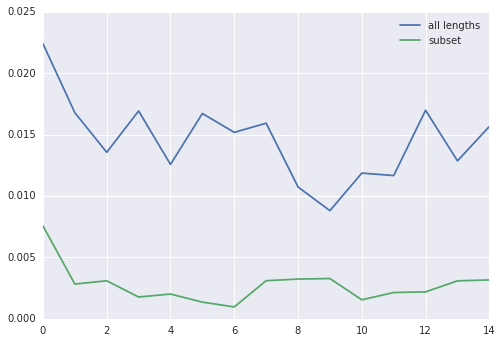

In [595]:
import seaborn
seaborn.plt.plot(range(15), aucs_all[0].std(axis=0))
seaborn.plt.plot(range(15), aucs_subset[0].std(axis=0))
seaborn.plt.legend(["all lengths", "subset"])

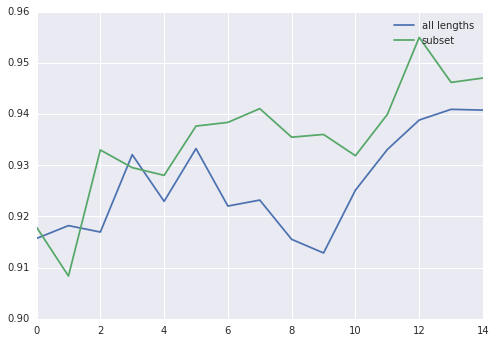

In [603]:
import seaborn
seaborn.plt.plot(range(15), aucs_all[10].mean(axis=0))
seaborn.plt.plot(range(15), aucs_subset[10].mean(axis=0))
seaborn.plt.legend(["all lengths", "subset"])

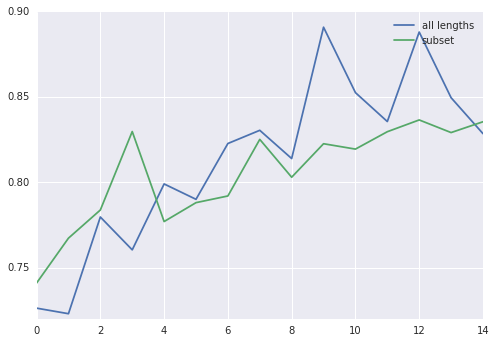

In [604]:
import seaborn
seaborn.plt.plot(range(15), aucs_all[11].mean(axis=0))
seaborn.plt.plot(range(15), aucs_subset[11].mean(axis=0))
seaborn.plt.legend(["all lengths", "subset"])

In [607]:
fit({9: models_by_length[9]}, dataframes_by_length, n_epochs=20, batch_size=32)

9mer, n=117687


In [608]:
model_9mer = models_by_length[9]

In [610]:
model_9mer.save("multi_allele_multi_assay_9mer.h5")

In [629]:
from sklearn.decomposition import PCA

In [625]:
aa_embedding = model_9mer.get_weights()[0]
allele_embedding = model_9mer.get_weights()[1]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


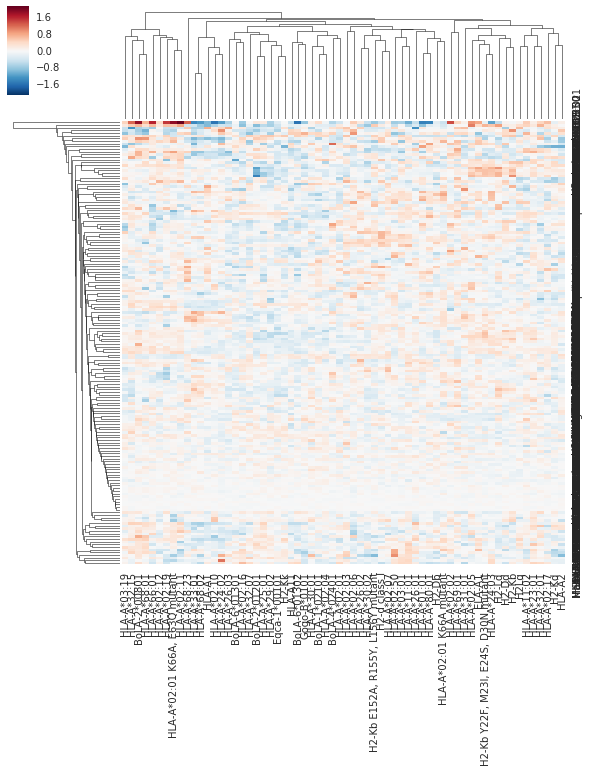

In [659]:
seaborn.clustermap(data=allele_embedding, xticklabels=sorted_alleles, yticklabels=sorted_alleles)

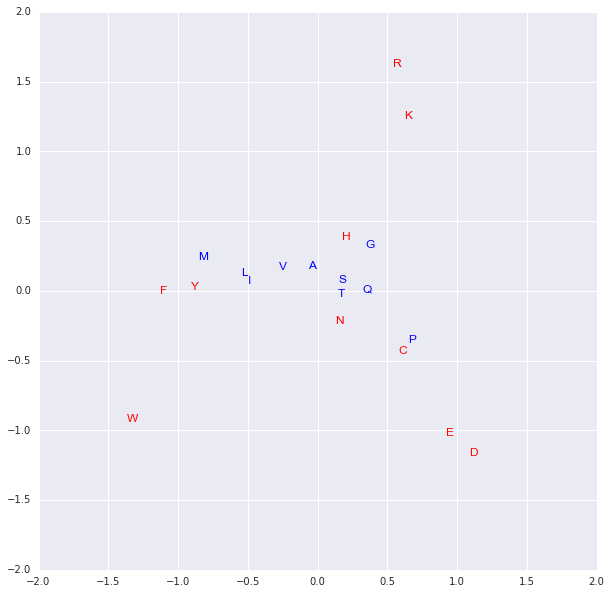

In [652]:

aa_coords = PCA(3).fit_transform(aa_embedding)
fig = seaborn.plt.figure(figsize=(10,10))
seaborn.plt.xlim(-2, 2)
seaborn.plt.ylim(-2, 2)
ax = fig.add_subplot(111)
for i, name in enumerate(sorted_amino_acids):
    ax.annotate(name, (aa_coords[i, 0], aa_coords[i, 1]), color=('r' if aa_coords[i, 2]>0 else 'b'))

In [689]:
scale = aa_coords.std()
sims = np.zeros((n_amino_acids, n_amino_acids))
for i, x in enumerate(aa_coords):
    for j, y in enumerate(aa_coords):
        sims[i,j] = np.exp(-(((x-y)/scale)**2).mean())

sims_dict = {}
for i, aa_i in enumerate(sorted_amino_acids):
    sims_dict[aa_i] = {}
    for j, aa_j in enumerate(sorted_amino_acids):
        sims_dict[aa_i][aa_j] = sims[i,j]
sims_dict

{'A': {'A': 1.0,
  'C': 0.17826323211193085,
  'D': 0.030704334378242493,
  'E': 0.090441621840000153,
  'F': 0.22103932499885559,
  'G': 0.56680440902709961,
  'H': 0.28793245553970337,
  'I': 0.82429331541061401,
  'K': 0.034293871372938156,
  'L': 0.81103396415710449,
  'M': 0.58980172872543335,
  'N': 0.46363204717636108,
  'P': 0.46707132458686829,
  'Q': 0.68766152858734131,
  'R': 0.026149144396185875,
  'S': 0.92429226636886597,
  'T': 0.93053990602493286,
  'V': 0.95417273044586182,
  'W': 0.0016880552284419537,
  'Y': 0.23855316638946533},
 'C': {'A': 0.17826323211193085,
  'C': 1.0,
  'D': 0.5200120210647583,
  'E': 0.59578710794448853,
  'F': 0.074265420436859131,
  'G': 0.51103901863098145,
  'H': 0.50664979219436646,
  'I': 0.15441153943538666,
  'K': 0.084316641092300415,
  'L': 0.12415679544210434,
  'M': 0.060286954045295715,
  'N': 0.76269632577896118,
  'P': 0.59238839149475098,
  'Q': 0.58932691812515259,
  'R': 0.029813220724463463,
  'S': 0.33211639523506165,
  'T

In [281]:
meas = dataframes_by_assay["half life ::: cellular MHC/direct/fluorescence"].meas
x = np.arange(1, 100)
y = np.percentile(meas, x)

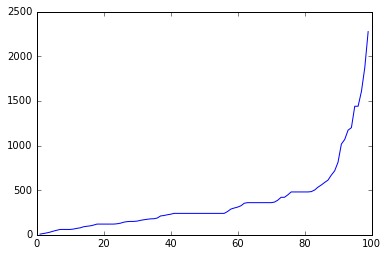

In [282]:
pylab.plot(x,y)

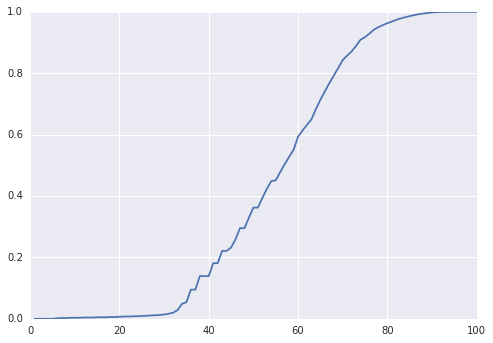

In [521]:
pylab.plot(x, 1.0 - np.exp(-y/120))

In [290]:
np.percentile(y, 20)

120.0

In [172]:
np.log(0)

-inf

In [185]:
1.0 - np.log(1) /np.log(50001)

1.0

In [190]:
np.percentile(y, 10)

31.652000000000008

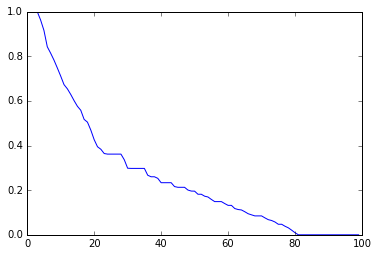

In [278]:
def encode_affinites(ic50):
    return np.maximum(0, np.minimum(1.0, 1.0 -np.log(0.5+ic50) / np.log(50000)))

pylab.plot(x, encode_affinites(y)) 

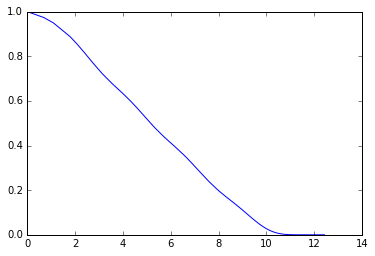

In [230]:
pylab.plot(np.log(1+y),sum(np.exp(-y/n) for n in [10, 100, 1000, 10000])/4)

0.0

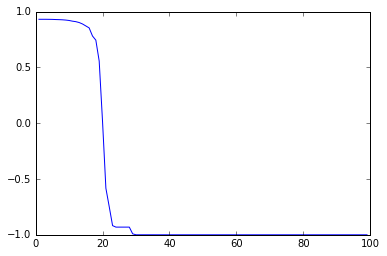

In [273]:
y_logistic = 2.0 - 2.0 / (1.0 + np.exp(-(100*y+1)/100000))
pylab.plot(x, np.tanh((500-y)/300))
y_logistic.min()

In [261]:
np.percentile(y, 40)

4000.0

In [447]:
1.0 - np.exp(-50/120)

0.34075936979955623

In [448]:
np.log(1.0 - .34)

-0.41551544396166595

In [449]:
_ * -120

49.861853275399916